# 2020년도 건강검진정보 샘플(1만건) 데이터를 이용한 시각화 

## 1. 데이터 기본 정보탐색 

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns  

In [2]:
DATA = pd.read_csv("health_data.csv")
df = pd.DataFrame(DATA)
df

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2020,9996,44,F,13,155,55,83.0,1.2,1.2,...,0.7,20.0,21.0,20.0,No,Yes,0,NaN,NaN,12/29/2021
9996,2020,9997,43,F,11,160,55,77.5,1.0,1.2,...,0.7,24.0,22.0,21.0,No,Yes,1,0.0,0.0,12/29/2021
9997,2020,9998,45,M,12,160,80,93.0,0.6,0.6,...,1.0,22.0,27.0,35.0,No,No,0,NaN,NaN,12/29/2021
9998,2020,9999,27,F,15,155,55,78.0,0.6,1.0,...,1.0,26.0,24.0,21.0,No,No,0,NaN,NaN,12/29/2021


In [3]:
DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

In [4]:
DATA.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [5]:
df.describe() 
df.describe(include='all') 


,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
count,10000.0,10000.00000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9912.000000,9912.00000,9912.000000,9912.000000,9998,9999,10000.000000,3251.000000,3251.000000,10000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,1
top,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,No,Yes,NaN,NaN,NaN,12/29/2021
freq,NaN,NaN,NaN,5138,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6231,5819,NaN,NaN,NaN,10000
mean,2020.0,5000.50000,34.100100,NaN,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,...,0.848484,27.58979,26.789851,38.098668,NaN,NaN,0.325100,0.175331,0.579514,NaN
std,0.0,2886.89568,12.394581,NaN,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,...,0.301012,17.88442,23.735687,58.184579,NaN,NaN,0.468436,0.380308,0.591269,NaN
min,2020.0,1.00000,11.000000,NaN,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,...,0.050000,3.00000,2.000000,3.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
25%,2020.0,2500.75000,27.000000,NaN,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,...,0.700000,20.00000,16.000000,16.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN
50%,2020.0,5000.50000,41.000000,NaN,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,...,0.800000,24.00000,21.000000,24.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN
75%,2020.0,7500.25000,44.000000,NaN,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,...,1.000000,30.00000,31.000000,39.000000,NaN,NaN,1.000000,0.000000,1.000000,NaN


In [17]:
DATA.isnull()
DATA.isnull().sum() 

기준년도              0
가입자일련번호           0
시도코드              0
성별코드              0
연령대코드(5세단위)       0
신장(5Cm단위)         0
체중(5Kg 단위)        0
허리둘레              0
시력(좌)             0
시력(우)             0
청력(좌)             0
청력(우)             0
수축기혈압            88
이완기혈압            88
식전혈당(공복혈당)       88
총콜레스테롤         5956
트리글리세라이드       5956
HDL콜레스테롤       5956
LDL콜레스테롤       6023
혈색소              88
요단백             139
혈청크레아티닌          88
(혈청지오티)AST       88
(혈청지오티)ALT       88
감마지티피            88
흡연상태              2
음주여부              1
구강검진수검여부          0
치아우식증유무        6749
치석             6749
데이터공개일자           0
dtype: int64

## 2. 남녀 간 체중 차이

In [35]:
df2 = pd.DataFrame(DATA, columns=['체중(5Kg 단위)',  '성별코드'])
df2

,체중(5Kg 단위),성별코드
0,60,M
1,65,F
2,55,F
3,70,M
4,50,F
...,...,...
9995,55,F
9996,55,F
9997,80,M
9998,55,F


In [44]:
Weight = df2['체중(5Kg 단위)']
print(Weight[:]) 

0       60
1       65
2       55
3       70
4       50
        ..
9995    55
9996    55
9997    80
9998    55
9999    75
Name: 체중(5Kg 단위), Length: 10000, dtype: int64


In [39]:
Sex = df2['성별코드']
print(Sex[:])

0       M
1       F
2       F
3       M
4       F
       ..
9995    F
9996    F
9997    M
9998    F
9999    F
Name: 성별코드, Length: 10000, dtype: object


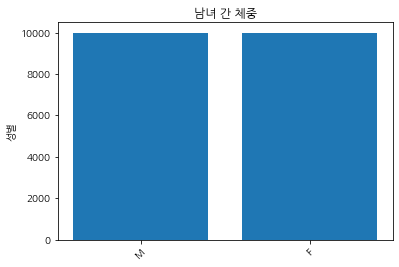

In [42]:
x = Sex[:].values.tolist()
y = Weight[:].index.tolist()
 
plt.bar(x, y, align='center')
plt.ylabel('성별')
plt.title('남녀 간 체중')
plt.xticks(rotation=45) 
plt.show()

## 3. 혈청크레아티닌과 허리둘레 간 상관관계 알아보기

In [34]:
df3 = pd.DataFrame(DATA, columns=['허리둘레',  '혈청크레아티닌'])
df3

,허리둘레,혈청크레아티닌
0,72.1,1.1
1,81.0,0.5
2,70.0,0.7
3,90.8,1.2
4,75.2,0.7
...,...,...
9995,83.0,0.7
9996,77.5,0.7
9997,93.0,1.0
9998,78.0,1.0


In [20]:
df3.min()

허리둘레       53.00
혈청크레아티닌     0.05
dtype: float64

In [21]:
df3.max()

허리둘레       134.0
혈청크레아티닌      9.2
dtype: float64

In [9]:
import matplotlib as mpl               
import matplotlib.pyplot as plt        
import matplotlib.font_manager as fm 

In [10]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq              # 나눔 폰트 설치

sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)                                # 전체 폰트 개수

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}") # 나눔 폰트 개수 (설치된 것을 확인)

'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'apt-get'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


sys_font number: 430
['C:\\Windows\\Fonts\\HMKMMAG.TTF', 'C:\\Windows\\Fonts\\BSSYM7.TTF', 'C:\\Windows\\Fonts\\HANBatangB.ttf', 'C:\\Windows\\Fonts\\GILLUBCD.TTF', 'C:\\Users\\kcl02\\AppData\\Local\\Microsoft\\Windows\\Fonts\\DXSnUB-KSCpc-EUC-H.ttf', 'C:\\Windows\\Fonts\\H2GSRB.TTF', 'C:\\Windows\\Fonts\\HANWing2.ttf', 'C:\\Windows\\Fonts\\LATINWD.TTF', 'C:\\Windows\\Fonts\\HANDotumExt.ttf', 'C:\\Windows\\Fonts\\verdanai.ttf', 'C:\\Windows\\Fonts\\msyi.ttf', 'C:\\Windows\\Fonts\\SCHLBKI.TTF', 'C:\\Windows\\Fonts\\corbell.ttf', 'C:\\Users\\kcl02\\AppData\\Local\\Microsoft\\Windows\\Fonts\\BMJUA_ttf.ttf', 'C:\\Windows\\Fonts\\seguihis.ttf', 'C:\\Windows\\Fonts\\BRLNSDB.TTF', 'C:\\Users\\kcl02\\AppData\\Local\\Microsoft\\Windows\\Fonts\\YES24GothicR.ttf', 'C:\\Windows\\Fonts\\FRADM.TTF', 'C:\\Windows\\Fonts\\HMFMPYUN.TTF', 'C:\\Windows\\Fonts\\Candarai.ttf', 'C:\\Windows\\Fonts\\VIVALDII.TTF', 'C:\\Windows\\Fonts\\BELLB.TTF', 'C:\\Windows\\Fonts\\comici.ttf', 'C:\\Windows\\Fonts\\sylfaen

In [13]:
%matplotlib inline
import matplotlib as mpl               # 기본 설정
import matplotlib.pyplot as plt        # 그래프 관련
import matplotlib.font_manager as fm   # 폰트 관련

print ('설정파일 위치: ', mpl.matplotlib_fname())
plt.rcParams['font.family'] = 'NanumGothic'

설정파일 위치:  C:\Users\kcl02\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


ValueError: x and y must be the same size

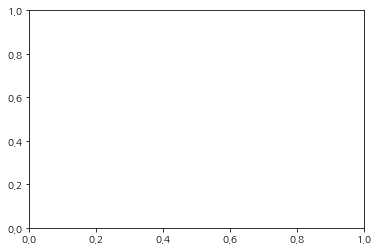

In [31]:
va1 = df3['허리둘레'].value_counts()
va2 = df3['혈청크레아티닌'].value_counts()
 
x = va1[:]
y = va2[:]

plt.scatter(x, y, color="blue", alpha=0.5, label="scatter point")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper left')
plt.title('허리둘레와 혈청크레아티닌 간 상관관계')
plt.show()